In [1]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from pylab import imread
from skimage.color import rgb2gray

In [2]:
def imshows(ImageData, LabelData, rows, cols, gridType = False):
    # Convert ImageData and LabelData to List
    from matplotlib import pyplot as plt
    ImageArray = list(ImageData)
    LabelArray = list(LabelData)
    if(rows == 1 & cols == 1):
        fig = plt.figure(figsize=(20,20))
    else:
        fig = plt.figure(figsize=(cols*8,rows*5))
    for i in range(1, cols * rows + 1):
        fig.add_subplot(rows, cols, i)
        image = ImageArray[i - 1]
        # If the channel number is less than 3, we display as grayscale image
        # otherwise, we display as color image
        if (len(image.shape) < 3):
            plt.imshow(image, plt.cm.gray)
            plt.grid(gridType)
        else:
            plt.imshow(image)
            plt.grid(gridType)
        plt.title(LabelArray[i - 1])
    plt.show()
def ShowThreeImages(IM1, IM2, IM3):
    imshows([IM1, IM2, IM3], ["Image 1","Image 2", "Image 3"], 1, 3)
def ShowTwoImages(IM1, IM2):
    imshows([IM1, IM2], ["Image 1","Image 2"], 1, 2)
def ShowOneImage(IM):
    imshows([IM], ["Image"], 1, 1)
def ShowListImages(listImage, row, col):
    listCaption = []
    for i in range(len(listImage)):
        listCaption.append(str(i))
    imshows(listImage,listCaption,row,col)

# REQUEST 1

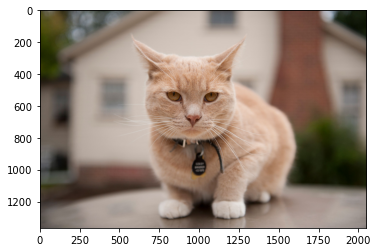

In [3]:
img_color = imread('Lab01 - Image\Sample01\cat.jpg')
imgplot = plt.imshow(img_color)

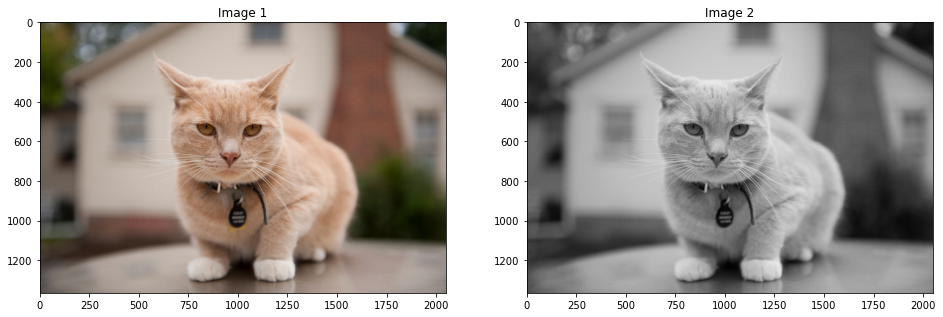

In [4]:
# Convert Image into Gray
img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)
ShowTwoImages(img_color, img_gray)

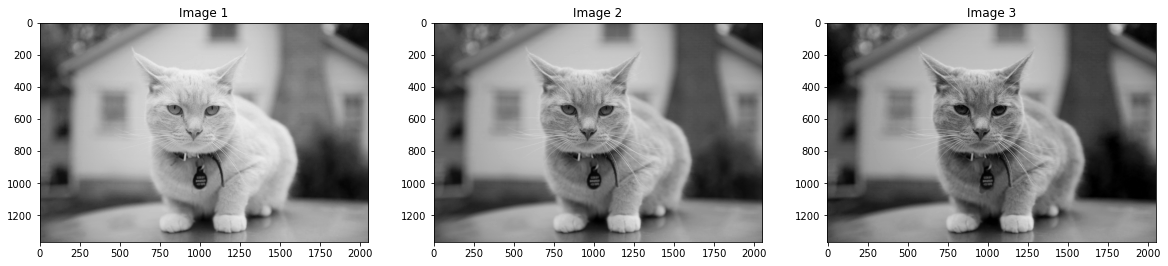

In [5]:
# Show each channel R, G, and B
ShowThreeImages(img_color[:,:,0],img_color[:,:,1],img_color[:,:,2])

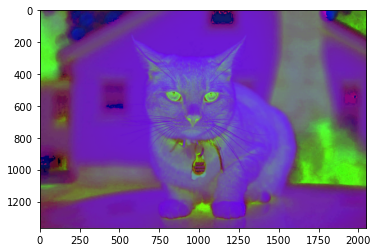

In [6]:
# Convert Image into HSV color spaces
img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)
plt.show()

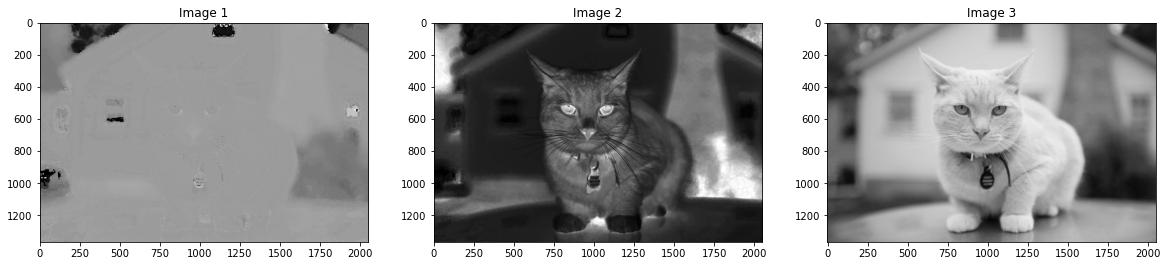

In [7]:
# Show each channel H , S and V
ShowThreeImages(img_hsv[:,:,0],img_hsv[:,:,1],img_hsv[:,:,2])

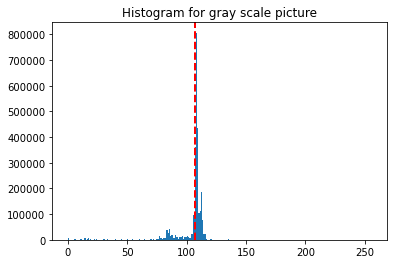

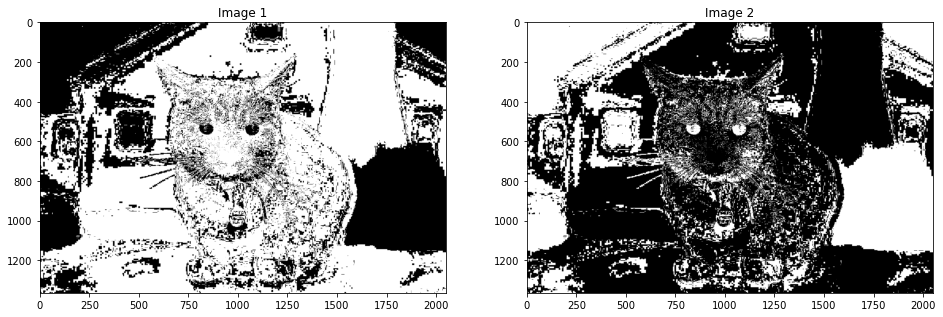

In [9]:
hue_img = img_hsv[:,:,0]
hue_threshold = 107
# Show Histogram of Hue Channel
hist = cv2.calcHist([hue_img],[0],None,[256],[0,256])
plt.hist(hue_img.ravel(),256,[0,256])
plt.axvline(x=hue_threshold, color='r', linestyle='dashed', linewidth=2)
plt.title('Histogram for gray scale picture')
plt.show()
# Use threshold to segment object by histogram
hue_binary01 = hue_img > hue_threshold
hue_binary02 = 1 - hue_binary01
ShowTwoImages(hue_binary01, hue_binary02)

In [10]:
def SegmentColorImageByMask(IM, Mask):        
    Mask = Mask.astype(np.uint8)    
    result = cv2.bitwise_and(IM, IM, mask = Mask)    
    return result

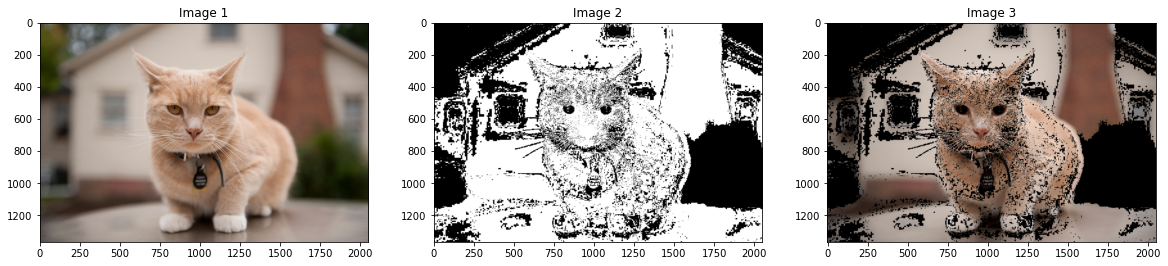

In [12]:
hue_binary01_rgb = SegmentColorImageByMask(img_color, hue_binary01)
ShowThreeImages(img_color, hue_binary01, hue_binary01_rgb)

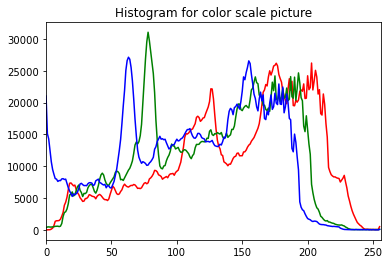

In [13]:
color = ('r', 'g', 'b')

for channel,col in enumerate(color):
    histr = cv2.calcHist([img_color],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histogram for color scale picture')
plt.show()

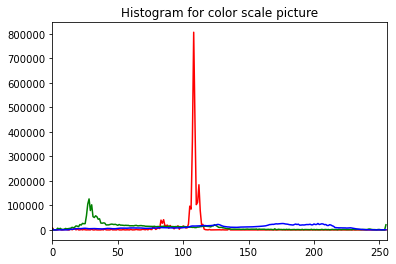

In [14]:
color = ('r', 'g', 'b')

for channel,col in enumerate(color):
    histr = cv2.calcHist([img_hsv],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Histogram for color scale picture')
plt.show()

# REQUEST 2

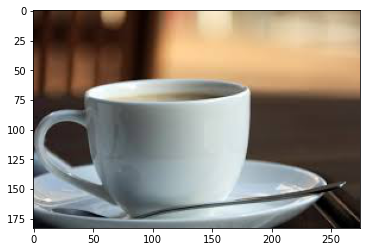

In [21]:
img_color = imread('Lab01 - Image\Sample01\coffee.jpg')
imgplot = plt.imshow(img_color)

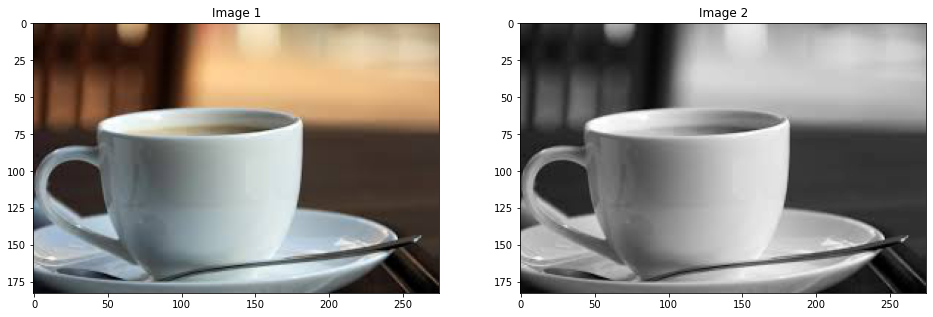

In [24]:
# Convert Image into Gray
img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)
ShowTwoImages(img_color, img_gray)

In [28]:
# Convert Image into HSV color spaces
img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)

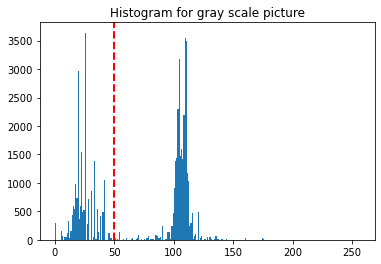

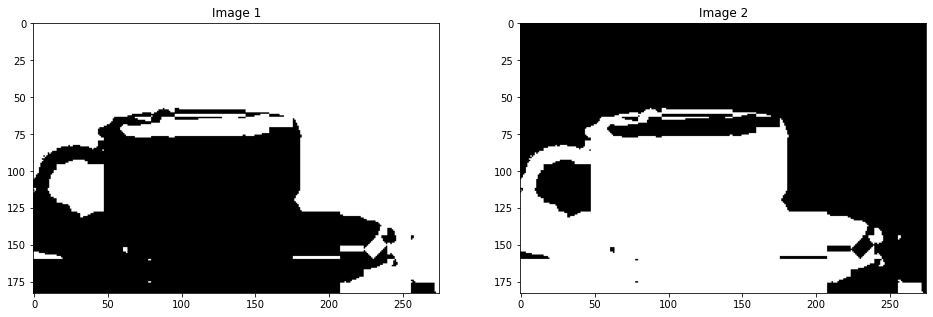

In [34]:
hue_img = img_hsv[:,:,0]
hue_threshold = 50
# Show Histogram of Hue Channel
hist = cv2.calcHist([hue_img],[0],None,[256],[0,256])
plt.hist(hue_img.ravel(),256,[0,256])
plt.axvline(x=hue_threshold, color='r', linestyle='dashed', linewidth=2)
plt.title('Histogram for gray scale picture')
plt.show()
# Use threshold to segment object by histogram
hue_binary01 = hue_img > hue_threshold
hue_binary02 = 1 - hue_binary01
ShowTwoImages(hue_binary01, hue_binary02)

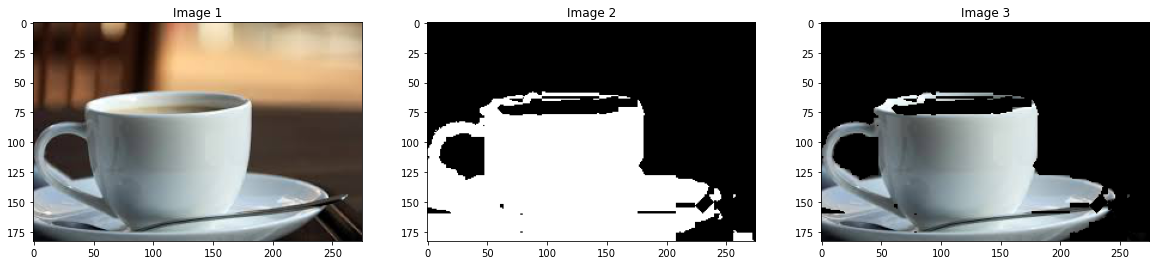

In [37]:
hue_binary02_rgb = SegmentColorImageByMask(img_color, hue_binary02)
ShowThreeImages(img_color, hue_binary02, hue_binary02_rgb)

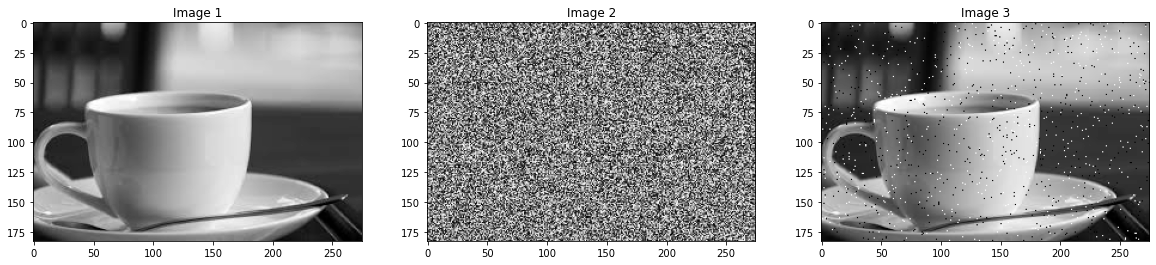

In [38]:
# Create Noise Image

noise = np.random.random(img_gray.shape)
image_noise = img_gray.copy()
image_noise[noise > 0.99] = 255
image_noise[noise < 0.01] = 0
ShowThreeImages(img_gray, noise, image_noise)

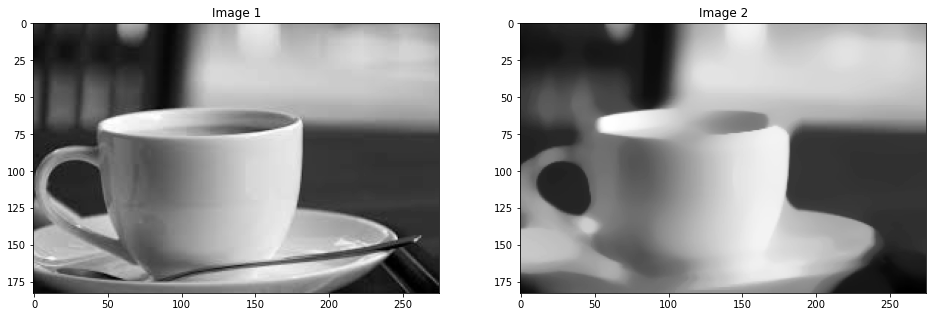

In [39]:
# Create Blurred Image

from skimage.filters.rank import median
from skimage.morphology import disk
image_blurred = median(img_gray, disk(10))
ShowTwoImages(img_gray, image_blurred)

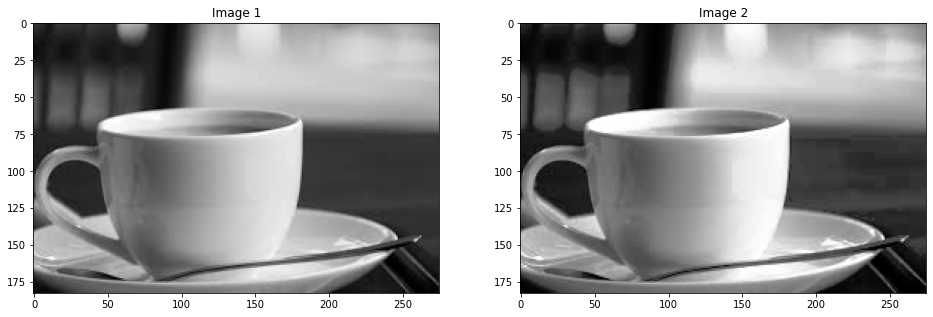

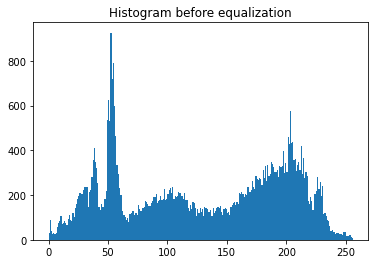

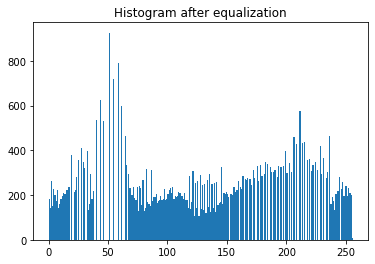

In [40]:
from skimage import data, exposure

image_equalization = exposure.equalize_hist(img_gray)
image_equalization = np.float32(image_equalization * 255)
ShowTwoImages(img_gray, image_equalization)
hist = cv2.calcHist([img_gray],[0],None,[256],[0,256])
plt.hist(img_gray.ravel(),256,[0,256])
plt.title('Histogram before equalization')
plt.show()
hist = cv2.calcHist([image_equalization],[0],None,[256],[0,256])
plt.hist(image_equalization.ravel(),256,[0,256])
plt.title('Histogram after equalization')
plt.show()

In [41]:
def histogram_equalize(img):
    r, g, b = cv2.split(img)
    red = cv2.equalizeHist(r)
    green = cv2.equalizeHist(g)
    blue = cv2.equalizeHist(b)
    return cv2.merge((red, green, blue))

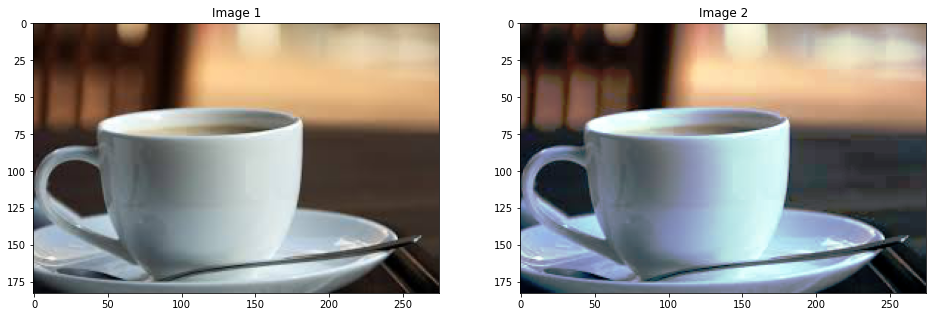

In [42]:
image_equalization_color = histogram_equalize(img_color)
ShowTwoImages(img_color, image_equalization_color)

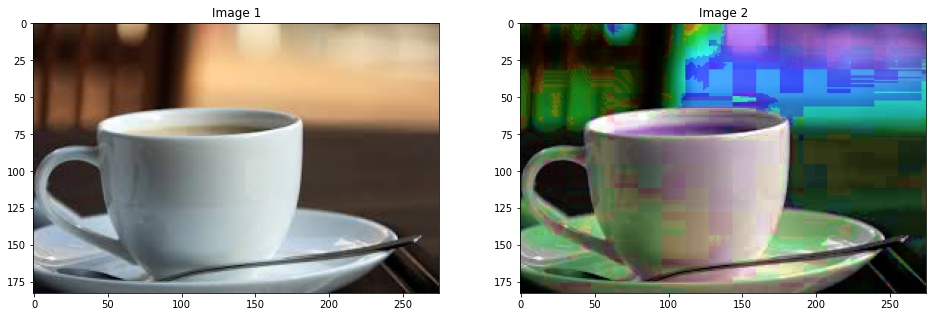

In [49]:
# Apply histogram equalization
channel = 0
img_hsv[:, :, channel] = cv2.equalizeHist(img_hsv[:, :, channel])
channel = 1
img_hsv[:, :, channel] = cv2.equalizeHist(img_hsv[:, :, channel])
channel = 2
img_hsv[:, :, channel] = cv2.equalizeHist(img_hsv[:, :, channel])
# Convert to RGB
image_enhanced = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
ShowTwoImages(img_color, image_enhanced)

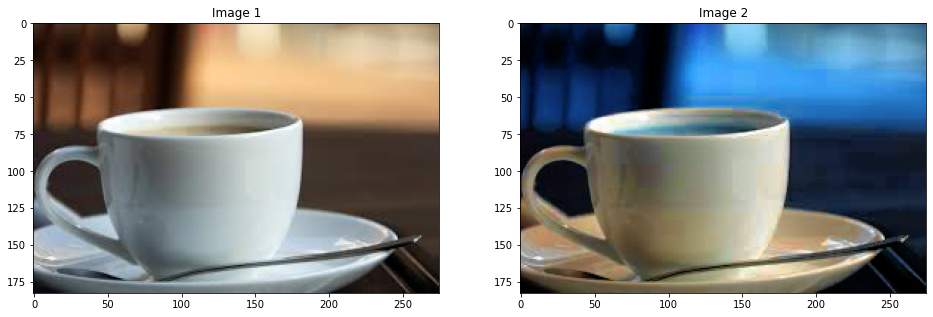

In [43]:
# Apply histogram equalization
channel = 1
img_hsv[:, :, channel] = cv2.equalizeHist(img_hsv[:, :, channel])
channel = 2
img_hsv[:, :, channel] = cv2.equalizeHist(img_hsv[:, :, channel])
# Convert to RGB
image_enhanced = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
ShowTwoImages(img_color, image_enhanced)

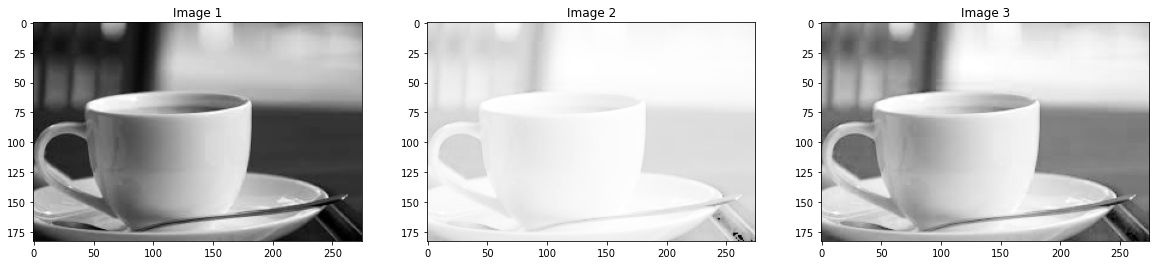

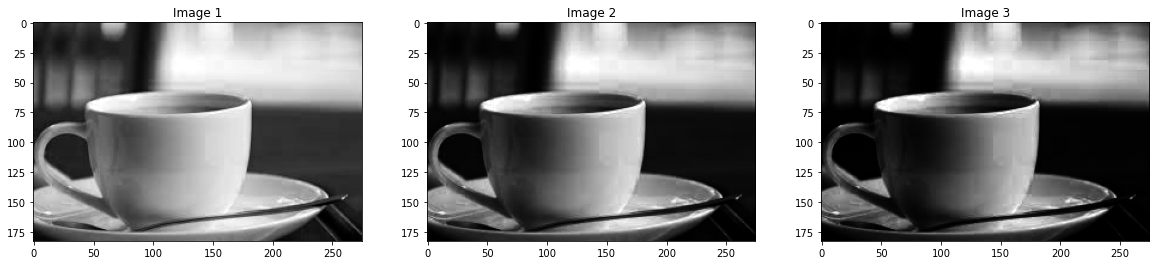

In [44]:
img_hsv = cv2.cvtColor(img_color, cv2.COLOR_RGB2HSV)

img = img_hsv[:,:,2]
gamma = [0.1, 0.5, 1.2, 2.2, 3.2]
gamma_corrected_01 = np.array(255*(img / 255) ** gamma[0], dtype = 'uint8')
gamma_corrected_02 = np.array(255*(img / 255) ** gamma[1], dtype = 'uint8')
gamma_corrected_03 = np.array(255*(img / 255) ** gamma[2], dtype = 'uint8')
gamma_corrected_04 = np.array(255*(img / 255) ** gamma[3], dtype = 'uint8')
gamma_corrected_05 = np.array(255*(img / 255) ** gamma[4], dtype = 'uint8')
ShowThreeImages(img_gray, gamma_corrected_01, gamma_corrected_02)
ShowThreeImages(gamma_corrected_03, gamma_corrected_04, gamma_corrected_05)

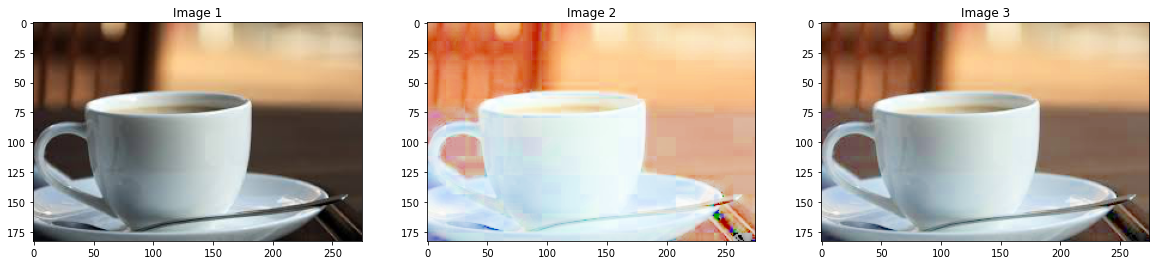

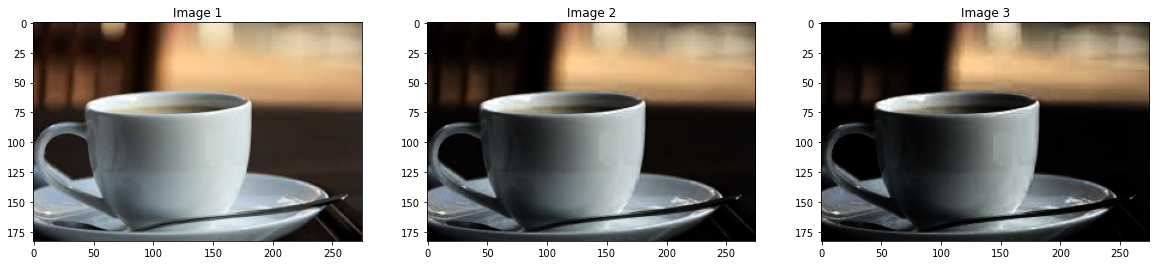

In [45]:
channel = 2

image_hsv_01 = img_hsv.copy()
image_hsv_01[:,:,2] = gamma_corrected_01
image_enhanced_01 = cv2.cvtColor(image_hsv_01, cv2.COLOR_HSV2RGB)
image_hsv_02 = img_hsv.copy()
image_hsv_02[:,:,2] = gamma_corrected_02
image_enhanced_02 = cv2.cvtColor(image_hsv_02, cv2.COLOR_HSV2RGB)
image_hsv_03 = img_hsv.copy()
image_hsv_03[:,:,2] = gamma_corrected_03
image_enhanced_03 = cv2.cvtColor(image_hsv_03, cv2.COLOR_HSV2RGB)
image_hsv_04 = img_hsv.copy()
image_hsv_04[:,:,2] = gamma_corrected_04
image_enhanced_04 = cv2.cvtColor(image_hsv_04, cv2.COLOR_HSV2RGB)
image_hsv_05 = img_hsv.copy()
image_hsv_05[:,:,2] = gamma_corrected_05
image_enhanced_05 = cv2.cvtColor(image_hsv_05, cv2.COLOR_HSV2RGB)
ShowThreeImages(img_color, image_enhanced_01, image_enhanced_02)
ShowThreeImages(image_enhanced_03, image_enhanced_04, image_enhanced_05)

In [46]:
# With (r1, s1), (r2, s2) as parameters, the function stretches the intensity levels
# by essentially decreasing the intensity of the dark pixels and increasing the intensity
# of the light pixels. If r1 = s1 = 0 and r2 = s2 = L-1, the function becomes a straight
# dotted line in the graph (which gives no effect).
# The function is monotonically increasing so that the order of intensity levels between pixels
# is preserved.
# Function to map each intensity level to output intensity level.
def pixelValTransformation(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2

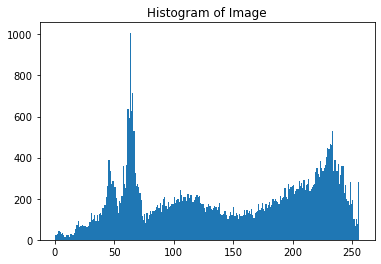

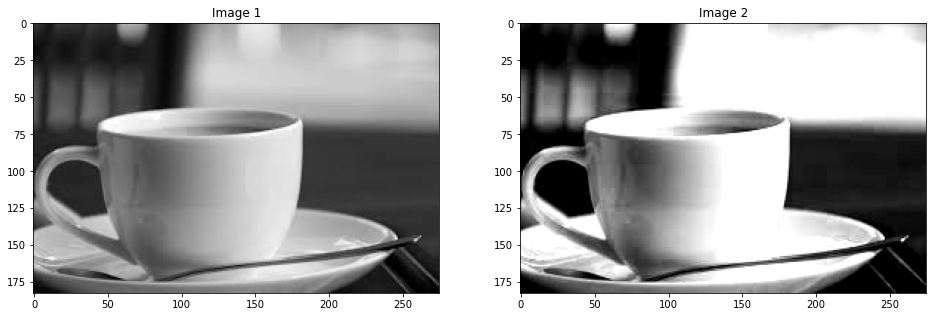

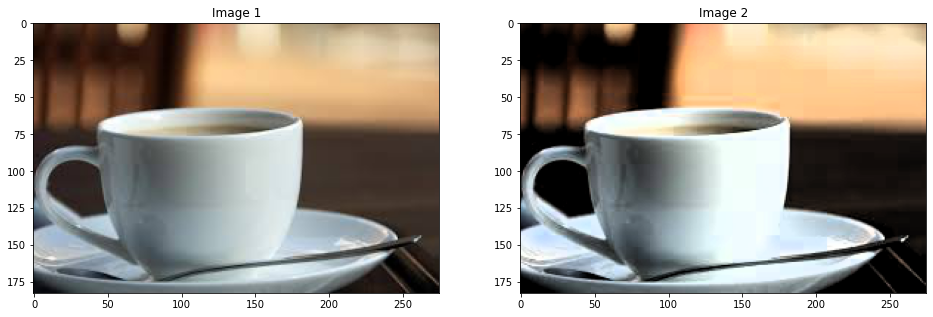

In [47]:
image_hsv = cv2.cvtColor(img_color, cv2.COLOR_RGB2HSV)

image_hsv_value = image_hsv[:,:,2]
hist = cv2.calcHist([image_hsv_value],[0],None,[256],[0,256])
plt.hist(image_hsv_value.ravel(),256,[0,256])
plt.title('Histogram of Image')
plt.show()
# Define parameters.
r1 = 50
s1 = 0
r2 = 200
s2 = 255
# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelValTransformation)
# Apply contrast stretching.
contrast_stretched = pixelVal_vec(image_hsv_value, r1, s1, r2, s2)
image_hsv[:,:,2] = contrast_stretched
image_enhanced = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
ShowTwoImages(img_gray, contrast_stretched)
ShowTwoImages(img_color, image_enhanced)

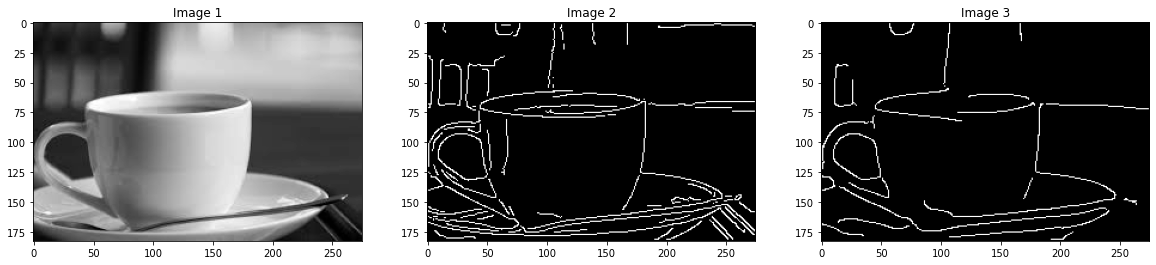

In [50]:
from skimage import feature

# sigma help to remove the noisy image in edge detection
image_edges_01 = feature.canny(img_gray)
image_edges_02 = feature.canny(img_gray, sigma=3)
ShowThreeImages(img_gray, image_edges_01, image_edges_02)